In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [2]:
NUM_TRIALS = 2000
BANDIT_PROB = [0.2, 0.5, 0.75]

In [16]:
class Bandit(object):
    def __inibt__(self,p):
        self.p = p
        self.a = 1
        self.b = 1
    
    def pull(self):
        return(np.random.random() < self.p)
    
    def sample(self):
        return(np.random.beta(self.a, self.b))
    
    def update(self, x):
        self.a += x
        self.b += 1 - x

def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f'real p: {b.p:.4f}')
    plt.title(f'Bandit distributions after {trial} trials')
    plt.legend()
    plt.show()
    
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROB]
    sample_points = [5, 10,20 ,50 ,100, 200, 500, 1000, 1500, 1999]
    for i in range(NUM_TRIALS):
        bestb = None
        maxsample = -1
        allsamples = []
        for b in bandits:
            sample = b.sample()
            allsamples.append(f"{sample:.4f}")
            if sample > maxsample:
                maxsample = sample
                bestb = b
        if i in sample_points:
            print(f"Current Samples {allsamples}")
            plot(bandits, i)
        x = bestb.pull()
        bestb.update(x)

Current Samples ['0.2296', '0.1983', '0.2165']


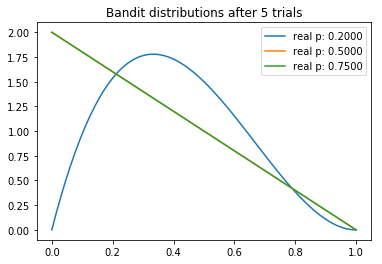

Current Samples ['0.3656', '0.1879', '0.0660']


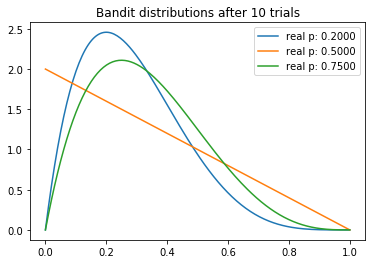

Current Samples ['0.2091', '0.2137', '0.5983']


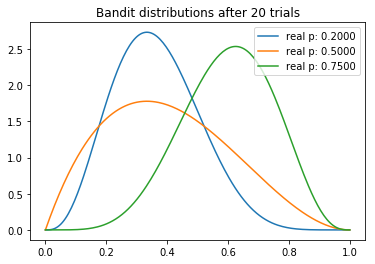

Current Samples ['0.2796', '0.3245', '0.8296']


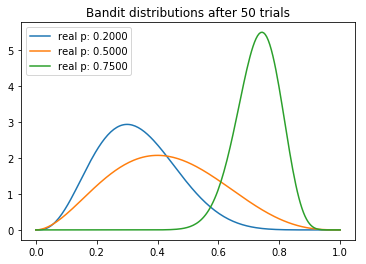

Current Samples ['0.4569', '0.3366', '0.7286']


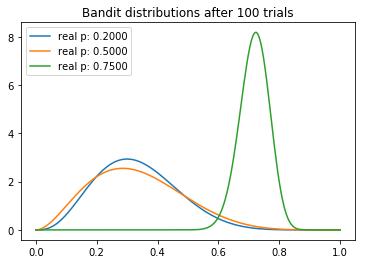

Current Samples ['0.4334', '0.1979', '0.7456']


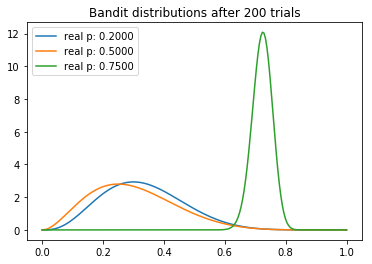

Current Samples ['0.3123', '0.2538', '0.7266']


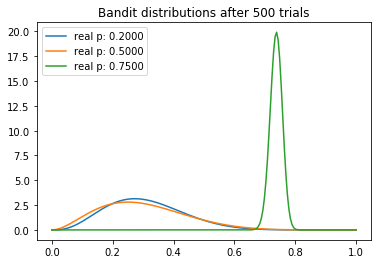

Current Samples ['0.1526', '0.3277', '0.7465']


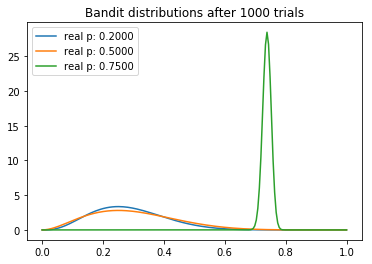

Current Samples ['0.3208', '0.3664', '0.7521']


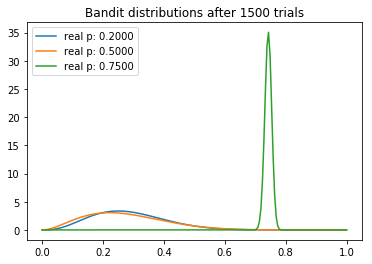

Current Samples ['0.2476', '0.2244', '0.7320']


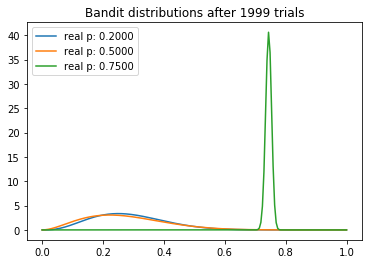

In [17]:
experiment()